### Name - Divya Shah
# Task # 3 - To Explore Unsupervised Machine Learning
## To predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates


## Reading the data set

In [2]:
# Load the iris dataset
iris = pd.read_csv("./Iris.csv")
iris.head() # See the first 5 rows



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Checking for any null values

In [5]:
iris.isna().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Visualizing the data set

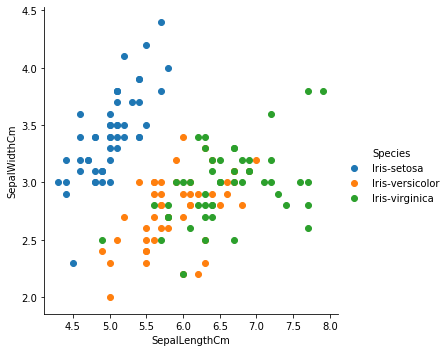

In [6]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
#using sepal length and width as features for plotting
sns.FacetGrid(iris, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

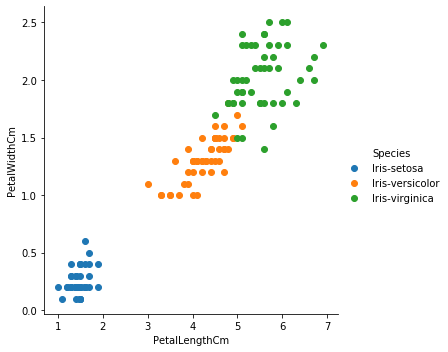

In [7]:
#using petallength and petalwidth as features for plotting
sns.FacetGrid(iris, hue="Species", height=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

### Observation : As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. 

## Now let us see how the length and width vary according to the species

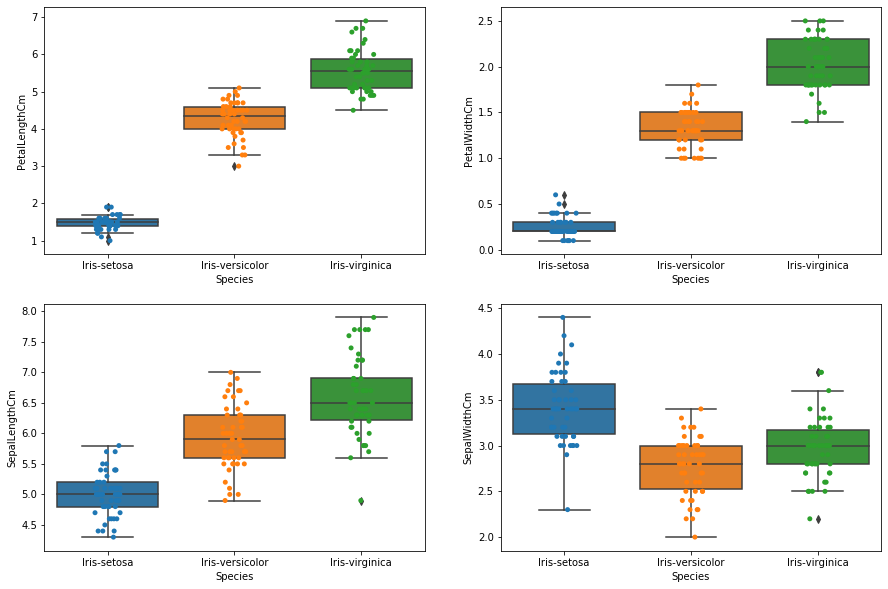

In [8]:
# Box Plot with a layer of individual points on top of it through Seaborn's striplot

# We'll use jitter=True so that all the points don't fall in single vertical lines above the species

# Saving the resulting axes as ax each time causes the resulting plot to be shown on top of the previous axes
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.subplot(2,2,2)
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray")
plt.subplot(2,2,3)
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="SepalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.subplot(2,2,4)
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=iris)
ax = sns.stripplot(x="Species", y="SepalWidthCm", data=iris, jitter=True, edgecolor="gray")

## Violin Plot
1. A violin plot combines the benefits of box plot and strip plot and simplifies them
1. Denser regions of the data are fatter, and sparser regions thiner in a violin plot

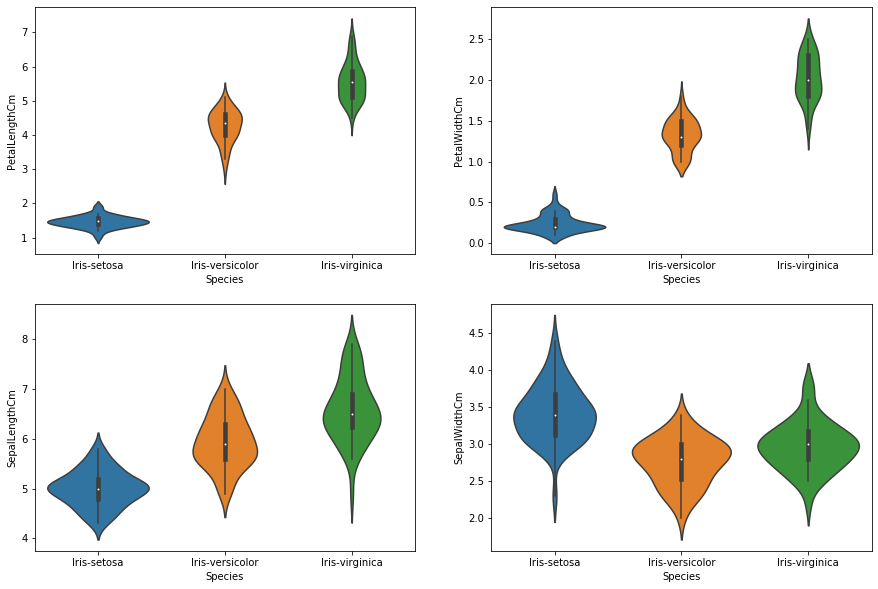

In [9]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

## KDE Plot
A final seaborn plot useful for looking at univariate relations is the kdeplot,which creates and visualizes a kernel density estimate of the underlying feature

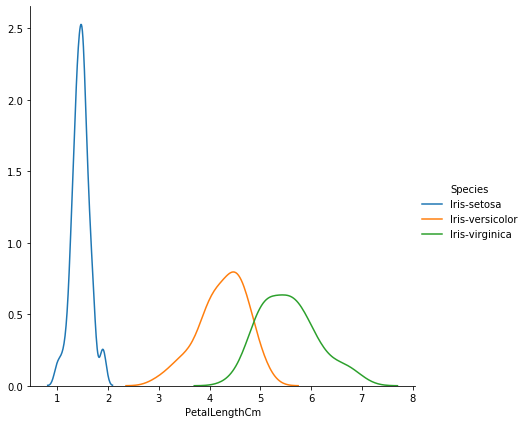

In [10]:

sns.FacetGrid(iris, hue="Species", height=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

## Parallel Plot
1. Parallel plot allow to compare the feature of several individual observations on a set of numerical variables.
1. Each vertical bar represents a feature(column or variable) like petal length (cm).
1. Values are then plotted as series of lines connected across each axis.
1. Different colors shows different classes like setosa.
1. Parallel plot allow to detect interesting patterns. For example as you can see we can easily classify setosa according to petal width (cm) feature.

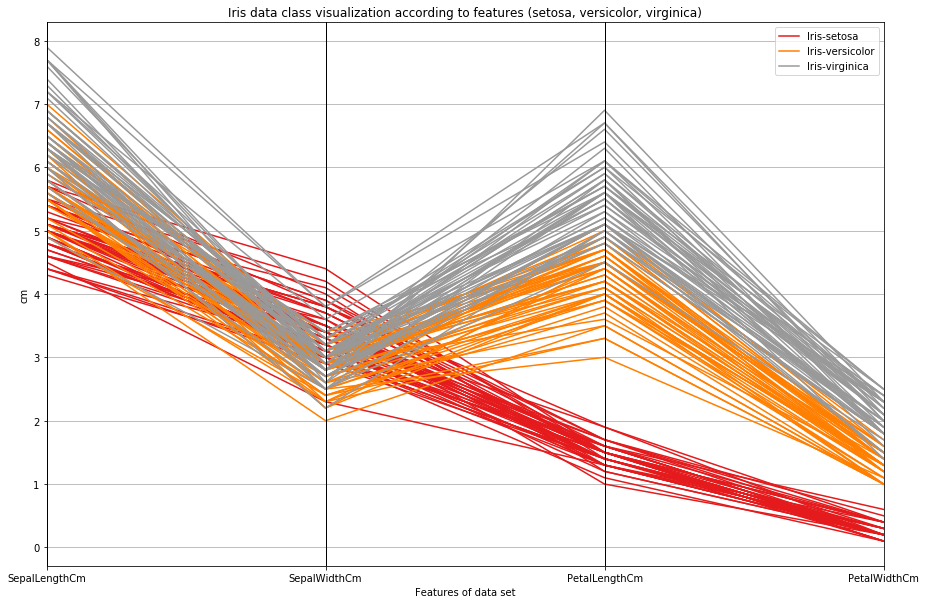

In [11]:
data = iris.drop(['Id'],axis=1)
plt.figure(figsize=(15,10))
parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set1"))
plt.title("Iris data class visualization according to features (setosa, versicolor, virginica)")
plt.xlabel("Features of data set")
plt.ylabel("cm")
plt.show()

## Pair Plot
1. Pairplot shows the bivariate relation between each pair of features
2. From the pairplot, we'll see that the Iris-setosa species is separated from the other two across all feature combinations

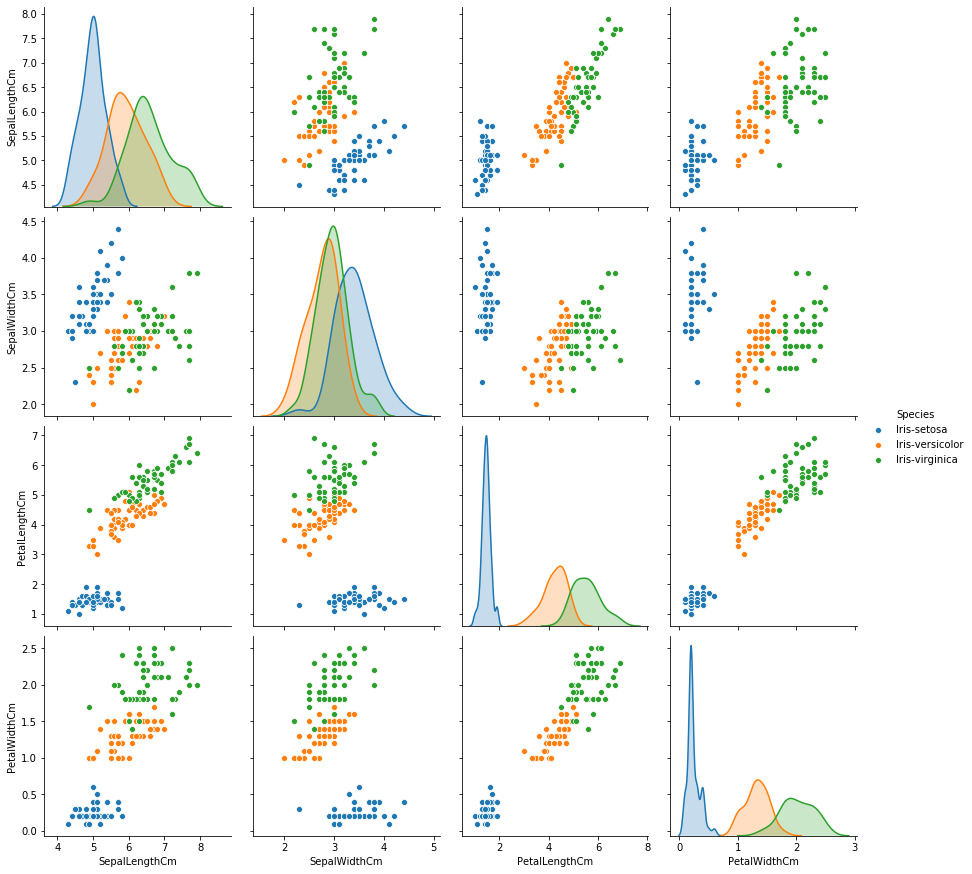

In [12]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=3, diag_kind="kde")

## Plotting correlation matrix

In [13]:
#dropping the Id column as it is unecessary, axis=1 specifies that it should 
#be column wise, inplace =1 means the changes should be reflected into the dataframe
iris.drop('Id',axis=1,inplace=True)

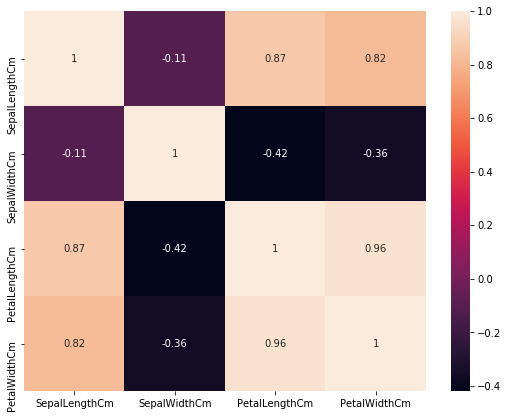

In [14]:
correlations = iris.corr()
f , ax = plt.subplots(figsize = (9,7))
sns.heatmap(correlations , annot = True)

#### Observation: The Sepal Width and Sepal Length are not correlated .The Petal Width and Petal Length are highly correlated



## K-Means
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

### Using the elbow method to determine the optimal number of clusters for k-means clustering

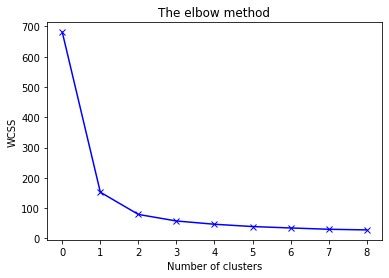

In [15]:
x = iris.iloc[:, [0, 1, 2,3]]
scores = []
range_values = range(1,10)
for i in range_values:
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(x)
    
    scores.append(kmeans.inertia_)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.plot(scores , 'bx-')

## Implement K-means with 3 clusters

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [17]:
kmeans.cluster_centers_.shape

(3, 4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871


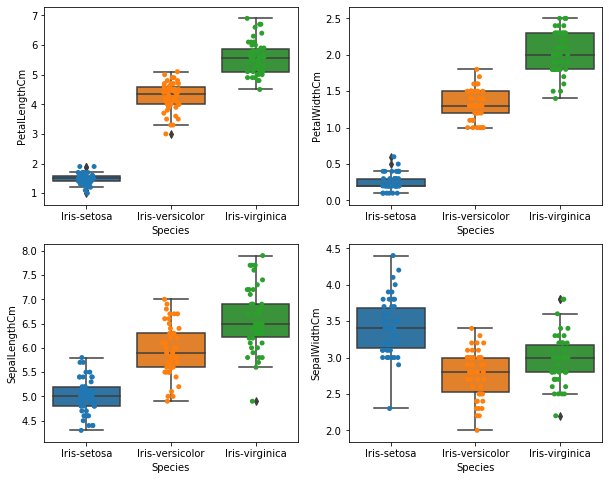

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.subplot(2,2,2)
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray")
plt.subplot(2,2,3)
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="SepalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.subplot(2,2,4)
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=iris)
ax = sns.stripplot(x="Species", y="SepalWidthCm", data=iris, jitter=True, edgecolor="gray")

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [x.columns])
cluster_centers

### Observations :
1. Here we can see the  cluster(1)  has petal length centroid of 1.46 cm which is iris setosa when compared to the corresponding box plot of petal length.
2. The cluster (2) has petal length centroid 4.3 cm and cluster (0)  has petal length centroid 5.7 cm which are iris-versicolor and iris-virginia respectively.
3. Similarly we can compare other features apart from petal length centroid with the correponding box plots.

In [19]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

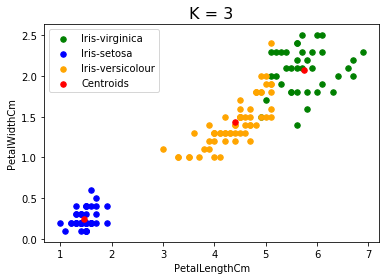

In [20]:
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
x["labels"] = y_kmeans
plt.scatter(x.PetalLengthCm[x.labels == 0],x.PetalWidthCm[x.labels == 0],s = 30, c = 'green', label = 'Iris-virginica')
plt.scatter(x.PetalLengthCm[x.labels == 1],x.PetalWidthCm[x.labels == 1],s = 30, c = 'blue', label = 'Iris-setosa')
plt.scatter(x.PetalLengthCm[x.labels == 2],x.PetalWidthCm[x.labels == 2],s = 30, c = 'orange', label = 'Iris-versicolour')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 30, c = 'red', label = 'Centroids')

plt.legend()

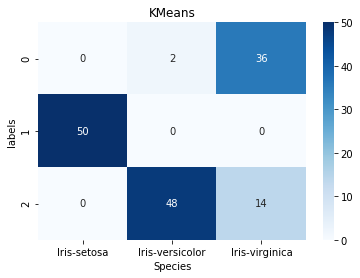

In [21]:
# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':y_kmeans,"Species":iris['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=True,cmap="Blues")

## Conclusion:
1. The model failed on 16 data points over 150 data points, hence giving 89.3% accuracy
2. We can also see that clustering "iris-setosa" was easy because it's data points are easily differentiable from others